### Riddler Express

This week, both puzzles come courtesy of Ben Orlin, author of the newly released “Math Games with Bad Drawings.” In addition to its terrible drawings, the book includes several games that have appeared in this column, including Tax Collector and Racetrack. Ben’s Express puzzle relates to tic-tac-toe.

In tic-tac-toe, you can rate a square’s “real estate value” by how many possible three-in-a-rows pass through it. Thus, the center scores 4, the corners score 3 and the edges score 2.

That means the center is the “most valuable” real estate, while the edges are the “least valuable.”

Recent Stories from FiveThirtyEight
Now, let’s try three-dimensional tic-tac-toe, played on a 3-by-3-by-3 board. Which positions are the most and least valuable, and how much are they worth?

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from itertools import product, combinations
import warnings
warnings.filterwarnings("ignore") # matplot warning on 3d projections

# build array of vals for 2-d example -> confirm proper process
arr = np.asarray(range(1,10))
arr.shape = (3,3)
print(arr)

# store
legit_lines = []

# find rows & cols:
for r in range(arr.shape[0]):
    legit_lines.append([v for v in arr[r,:]])
    legit_lines.append([v for v in arr[:,r]])
    
# add diag manually for now (lazy)
legit_lines.append([1,5,9])
legit_lines.append([3,5,7])

# iterate over vals
for v in np.nditer(arr):
    total = 0
    for line in legit_lines:
        if v in line:
            total += 1
    print(f"For start {v}, coordinate {np.where(arr == v)[0][0], np.where(arr == v)[1][0]} there are {total} ways to win")
    

[[1 2 3]
 [4 5 6]
 [7 8 9]]
For start 1, coordinate (0, 0) there are 3 ways to win
For start 2, coordinate (0, 1) there are 2 ways to win
For start 3, coordinate (0, 2) there are 3 ways to win
For start 4, coordinate (1, 0) there are 2 ways to win
For start 5, coordinate (1, 1) there are 4 ways to win
For start 6, coordinate (1, 2) there are 2 ways to win
For start 7, coordinate (2, 0) there are 3 ways to win
For start 8, coordinate (2, 1) there are 2 ways to win
For start 9, coordinate (2, 2) there are 3 ways to win


## Solving a Cube

This gets a bit trickier as we now need to account for planes that can cut through. 

In [2]:
# build array of vals
arr = np.asarray(range(1,28))
arr.shape = (3,3,3)
print(arr)

# store
legit_lines = []

# find planes parallel to cube (3 total)
for r in range(arr.shape[0]):
    for axis in range(arr.shape[2]):
        legit_lines.append([v for v in arr[r,:, axis]])
        legit_lines.append([v for v in arr[:,r, axis]])
        legit_lines.append([v for v in arr[axis,r, :]])
        
# hard part now is coding a process for diagonals 
# 6 total diagonals planes to consider, each with 3 possible

face_diag = []

# 6 planes go to opposite edges
for i in range(arr.shape[0]):
    face_diag.append([arr[i,0,0], arr[i,1,1], arr[i,2,2]]) # top left -> bottom right
    face_diag.append([arr[i,2,0], arr[i,1,1], arr[i,0,2]]) # bottom left -> top right
    face_diag.append([arr[0,0,i], arr[1,1,i], arr[2,2,i]]) # plane downward
    face_diag.append([arr[0,i,0], arr[1,i,1], arr[2,i,2]]) # plane through center
    face_diag.append([arr[2,0,i], arr[1,1,i], arr[0,2,i]]) # plane downward
    face_diag.append([arr[2,i,0], arr[1,i,1], arr[0,i,2]]) # plane through center

# and 4 more diagonals through cube manually - e.g 1-14-27, 7-14-21, 25-14-3, 19-14-9
face_diag.append([1,14,27])
face_diag.append([7,14,21])
face_diag.append([25,14,3])
face_diag.append([19,14,9])

# ensure no duplicates
total_lines = face_diag + legit_lines

# sort each line
sorted_total = [sorted(l) for l in total_lines]
print(len(sorted_total))

# make a set for distinct - can't use a set on a list so need to rework slightly
temp_list = [(x[0], x[1], x[2]) for x in sorted_total]
set_sorted_total = set(temp_list)
print(len(set_sorted_total)) # no duplicates it seems

# iterate over vals
minimal_points = [] # i know min is 4 now
for v in np.nditer(arr):
    total = 0
    for line in set_sorted_total:
        if v in line:
            total += 1
    coord = np.where(arr == v)[0][0], np.where(arr == v)[1][0], np.where(arr == v)[2][0]
    print(f"For start {v}, coordinate {coord} there are {total} ways to win")
    
    if total == 4:
        minimal_points.append(coord)

[[[ 1  2  3]
  [ 4  5  6]
  [ 7  8  9]]

 [[10 11 12]
  [13 14 15]
  [16 17 18]]

 [[19 20 21]
  [22 23 24]
  [25 26 27]]]
49
49
For start 1, coordinate (0, 0, 0) there are 7 ways to win
For start 2, coordinate (0, 0, 1) there are 4 ways to win
For start 3, coordinate (0, 0, 2) there are 7 ways to win
For start 4, coordinate (0, 1, 0) there are 4 ways to win
For start 5, coordinate (0, 1, 1) there are 5 ways to win
For start 6, coordinate (0, 1, 2) there are 4 ways to win
For start 7, coordinate (0, 2, 0) there are 7 ways to win
For start 8, coordinate (0, 2, 1) there are 4 ways to win
For start 9, coordinate (0, 2, 2) there are 7 ways to win
For start 10, coordinate (1, 0, 0) there are 4 ways to win
For start 11, coordinate (1, 0, 1) there are 5 ways to win
For start 12, coordinate (1, 0, 2) there are 4 ways to win
For start 13, coordinate (1, 1, 0) there are 5 ways to win
For start 14, coordinate (1, 1, 1) there are 13 ways to win
For start 15, coordinate (1, 1, 2) there are 5 ways t

### Print Points in Line Segment:

In [3]:
lines = {}
print("Least Valuable Region")
for line in set_sorted_total:
    if 4 in line:
        coords = []
        for v in line:
            coords.append((np.where(arr == v)[0][0], np.where(arr == v)[1][0], np.where(arr == v)[2][0]))
        print(f"Line values {line}, or coordinates: {coords}")


Least Valuable Region
Line values (4, 14, 24), or coordinates: [(0, 1, 0), (1, 1, 1), (2, 1, 2)]
Line values (4, 5, 6), or coordinates: [(0, 1, 0), (0, 1, 1), (0, 1, 2)]
Line values (4, 13, 22), or coordinates: [(0, 1, 0), (1, 1, 0), (2, 1, 0)]
Line values (1, 4, 7), or coordinates: [(0, 0, 0), (0, 1, 0), (0, 2, 0)]


In [4]:
lines = {}
print("Most Valuable Region")
for line in set_sorted_total:
    if 14 in line:
        coords = []
        for v in line:
            coords.append((np.where(arr == v)[0][0], np.where(arr == v)[1][0], np.where(arr == v)[2][0]))
        print(f"Line values {line}, or coordinates: {coords}")

Most Valuable Region
Line values (12, 14, 16), or coordinates: [(1, 0, 2), (1, 1, 1), (1, 2, 0)]
Line values (4, 14, 24), or coordinates: [(0, 1, 0), (1, 1, 1), (2, 1, 2)]
Line values (11, 14, 17), or coordinates: [(1, 0, 1), (1, 1, 1), (1, 2, 1)]
Line values (9, 14, 19), or coordinates: [(0, 2, 2), (1, 1, 1), (2, 0, 0)]
Line values (1, 14, 27), or coordinates: [(0, 0, 0), (1, 1, 1), (2, 2, 2)]
Line values (6, 14, 22), or coordinates: [(0, 1, 2), (1, 1, 1), (2, 1, 0)]
Line values (5, 14, 23), or coordinates: [(0, 1, 1), (1, 1, 1), (2, 1, 1)]
Line values (10, 14, 18), or coordinates: [(1, 0, 0), (1, 1, 1), (1, 2, 2)]
Line values (2, 14, 26), or coordinates: [(0, 0, 1), (1, 1, 1), (2, 2, 1)]
Line values (3, 14, 25), or coordinates: [(0, 0, 2), (1, 1, 1), (2, 2, 0)]
Line values (8, 14, 20), or coordinates: [(0, 2, 1), (1, 1, 1), (2, 0, 1)]
Line values (13, 14, 15), or coordinates: [(1, 1, 0), (1, 1, 1), (1, 1, 2)]
Line values (7, 14, 21), or coordinates: [(0, 2, 0), (1, 1, 1), (2, 0, 2)]


### Final Answer

Least Valuable: 4 "three-in-a-rows"
- These are the middle vertices on the exterior of the cube (highlighted in red)
- These all will have an X, Y, and Z parallel line as well as a diagonal. 


Most Valuable: 13 "three-in-a-rows"
- The central vertex (highlighted in green) 

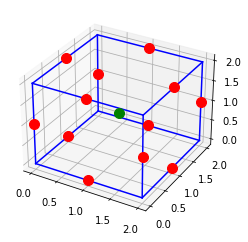

In [5]:
# source: https://stackoverflow.com/questions/11140163/plotting-a-3d-cube-a-sphere-and-a-vector-in-matplotlib
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_aspect("auto")

# draw cube
r = [0, 2]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")
        
# add points for most common
ax.scatter([1], [1], [1], color="g", s=100)

# add points for least common
for coord in minimal_points:
    ax.scatter(coord[0], coord[1], coord[2], color="r", s=100)